# Project: Data Wrangling

## Table of Contents
<ul>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#storing">Storing Data</a></li>
<li><a href="#analyzing">Analyzing and Visualizing Data</a></li>
</ul>

In [243]:
#importing libraries to be used
import pandas as pd
import numpy as np
import requests
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt

<a id='gathering'></a>
## Data Gathering
Three datasets are used for this project. They are all gathered from different sources.

**1. The first dataset is the gotten from the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv). It was downloaded.**

In [244]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

**2. The Requests library was used to download the second dataset: tweet image prediction (image_predictions.tsv)**

In [245]:
folder_name = 'image_df_folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

image_df_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(image_df_url)

In [246]:
with open(os.path.join(folder_name, image_df_url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [247]:
df_2 = pd.read_csv('image-predictions.tsv', sep = '\t')

**3. The Tweepy library was used to query an additional dataset via the Twitter API (tweet_json.txt)**

In [369]:
import tweepy
from time import sleep

In [370]:
from tweepy import OAuthHandler
from timeit import default_timer as timer
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

2356

In [371]:
def tweet_extraction():
    count = 0
    fails_dict = {}
    start = timer()
    with open('tweet_json.txt', 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [376]:
folder_name = 'tweet_df_folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

tweet_df_url = "https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt"
response = requests.get(tweet_df_url)

with open(os.path.join(folder_name, tweet_df_url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [378]:
df_3 = []
with open('tweet-json.txt') as f:
    for line in f:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        df_3.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'tweet_id' : tweet_id})
        
df_3 = pd.DataFrame(df_3, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

<a id='assessing'></a>
## Assessing Data
Eight (8) quality issues and two (2) tidiness issue were detected and documented in this section. Both visual assessment and programmatic assessment were used to assess the data.

#### Visual assessment

In [380]:
#Visually assessing the 1st dataset
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [381]:
##Visually assessing the 2nd dataset
df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [382]:
#Visually assessing the 3rd dataset
df_3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


#### Programmatic assessment

In [383]:
#A summary of the 1st dataset
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [384]:
#A summary of the 2nd dataset
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [385]:
#A summary of the 3rd dataset
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


Descriptive statistics of the data

In [386]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [387]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [388]:
df_3.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


Checking for missing values

In [389]:
df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [390]:
df_2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [391]:
df_3.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

Assessing for duplicates

In [392]:
df_1.duplicated().value_counts()

False    2356
dtype: int64

In [393]:
df_2.duplicated().value_counts()

False    2075
dtype: int64

In [394]:
df_3.duplicated().value_counts()

False    2354
dtype: int64

Assessing the "name" column in the df_1 table

In [395]:
df_1.loc[df_1['name']=='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [396]:
len(df_1.loc[df_1['name']=='None'])

745

In [397]:
#Checking for names in lowercase

lower_case_names = df_1['name'].str.contains('^[a-z]', regex = True)
df_1[lower_case_names].name.value_counts()

a               55
the              8
an               7
very             5
one              4
quite            4
just             4
not              2
getting          2
actually         2
mad              2
his              1
this             1
space            1
officially       1
light            1
infuriating      1
all              1
life             1
old              1
unacceptable     1
by               1
my               1
such             1
incredibly       1
Name: name, dtype: int64

In [398]:
len(df_1[lower_case_names].name.value_counts())

25

Assessing the doggo, floofer, pupper and puppo columns in the df_1 column

In [399]:
df_1.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [400]:
df_1.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [401]:
df_1.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [402]:
df_1.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### Quality issues

##### `df_1` table
1. The source column contains irrelevant HTML codes

2. timestamp column is in object format rather than datetime format

3. tweet_id column is in int64 format rather than object format

4. The name column has "None" values and some invalid values (such as "a", "an")

5. The expanded_url column contains missing values (about 59 observations)

6. There is inconsistency issue with the name column, as some names (such as "a", "an", etc) are in lowercase rather than uppercase

##### `df_2` table
7. The tweet_id column should be an object rather than having an int64 format

##### `df_3` table
8. tweet_id column is in int64 format rather than an object

### Tidiness issues
##### `df_1` table

1. There are some retweets and replies. Based on the key points, only original tweet ratings are needed, and thus the retweets and replies should be cleared off

2. The dog stages (doggo, floofer, pupper, and puppo) columns should be merged into a single column

**A copy of the original data is made before cleaning.**

In [403]:
# Make copies of original pieces of data
df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

<a id='cleaning'></a>
## Cleaning Data

### Issue #1:

#### `df_1`: Only original tweets needed; not retweets or replies

#### Define:

Drop columns with the retweets (retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp) and replies (in_reply_to_status_id and in_reply_to_user_id)

#### Code

In [404]:
df_1_clean = df_1_clean[(df_1_clean['in_reply_to_status_id'].isna() == True)  & (df_1_clean['retweeted_status_id'].isna() == True)]

df_1_clean = df_1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

#### Test

In [405]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #2:

#### `df_1`: dog stages spread across four columns

#### Define:

Merge the doggo, floofer, pupper and puppo columns into a single column "dog_stage"

#### Code

In [406]:
#creating an extra column to accommodate unknown or "None" values
def stage(dog):
    if dog['doggo']=='None' and dog['floofer']=='None' and dog['pupper']=='None' and dog['puppo']=='None':
        x = 'unknown'
    else:
        x ='None'
    return x

df_1_clean['unknown'] = df_1_clean.apply(stage, axis=1)

In [407]:
#melting the doggo, floofer, pupper, puppo columns into a single column, 'dog_stage'
df_1_clean = pd.melt(df_1_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                           var_name='dog_stage', value_name='value')

In [408]:
##dropping the duplicated rows
df_1_clean = df_1_clean[df_1_clean['value']!= 'None']
df_1_clean = df_1_clean.drop('value', axis=1)

#### Test

In [409]:
df_1_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
39,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
86,872967104147763200,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo
94,871515927908634625,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo
95,871102520638267392,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo
104,869596645499047938,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo
143,858843525470990336,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo
154,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo
161,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo
192,846514051647705089,2017-03-28 00:07:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,doggo


### Issue #3:

#### `df_1`: source column to be fixed

#### Define:

The source column contains HTML codes which need to be scraped

#### Code

In [410]:
from bs4 import BeautifulSoup as bs

image_source = []
for line, row in df_1_clean.iterrows():
    soup = bs(row.source)
    x = soup.find('a').contents[0]
    image_source.append(x)
    
df_1_clean['source'] = image_source

#### Test

In [411]:
df_1_clean.source.value_counts()

Twitter for iPhone     1974
Vine - Make a Scene      92
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #4:

#### `df_1`: timestamp column not in datetime format

#### Define:

The timestamp column is in object format and should be changed to datetime format

#### Code

In [412]:
df_1_clean['timestamp'] = pd.to_datetime(df_1_clean['timestamp'])

#### Test

In [413]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 9 to 10484
Data columns (total 9 columns):
tweet_id              2108 non-null int64
timestamp             2108 non-null datetime64[ns, UTC]
source                2108 non-null object
text                  2108 non-null object
expanded_urls         2105 non-null object
rating_numerator      2108 non-null int64
rating_denominator    2108 non-null int64
name                  2108 non-null object
dog_stage             2108 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 164.7+ KB


### Issue #5:

#### `df_1`: tweet_id column not in object format

#### Define:

tweet_id column should be in object format rather than int64 format

#### Code

In [414]:
df_1_clean['tweet_id'] = df_1_clean['tweet_id'].apply(str)

#### Test

In [415]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 9 to 10484
Data columns (total 9 columns):
tweet_id              2108 non-null object
timestamp             2108 non-null datetime64[ns, UTC]
source                2108 non-null object
text                  2108 non-null object
expanded_urls         2105 non-null object
rating_numerator      2108 non-null int64
rating_denominator    2108 non-null int64
name                  2108 non-null object
dog_stage             2108 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 164.7+ KB


### Issue #6:

#### `df_2`: tweet_id column not in object format

#### Define:

tweet_id column should be in object format rather than int64 format

#### Code

In [416]:
df_2_clean['tweet_id'] = df_2_clean['tweet_id'].apply(str)

#### Test

In [417]:
df_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #7:

#### `df_3`: tweet_id column not in object format

#### Define:

tweet_id column should be in object format rather than int64 format

#### Code

In [418]:
df_3_clean['tweet_id'] = df_3_clean['tweet_id'].apply(str)

#### Test

In [419]:
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Issue #8:

#### `df_1`: name column values in lowercase

#### Define:

There is inconsistency issue with the name column, as some names (such as "a", "an", etc) are in lowercase rather than uppercase

#### Code

In [420]:
lower_case_names = df_1_clean['name'].str.contains('^[a-z]', regex = True)
df_1_clean[lower_case_names].name.value_counts()

a               55
the              8
an               6
very             4
one              4
just             4
quite            3
not              2
getting          2
actually         2
his              1
this             1
space            1
officially       1
mad              1
light            1
infuriating      1
all              1
life             1
old              1
unacceptable     1
my               1
such             1
by               1
incredibly       1
Name: name, dtype: int64

In [421]:
df_1_clean['name'] = df_1_clean['name'].apply(str).str.capitalize()

#### Test

In [422]:
#lower_case_names = df_1_clean['name'].str.contains('^[a-z]', regex = True)
#df_1_clean[lower_case_names].name.value_counts()

lower_case_names = df_1_clean['name'].str.contains('^[a-z]', regex = True)
df_1_clean[lower_case_names].name.value_counts()

Series([], Name: name, dtype: int64)

### Further Cleaning

Merging the df_1_clean table and the df_2_clean table

In [440]:
df_1_clean = pd.merge(df_1_clean, df_2_clean, on = 'tweet_id', how = 'left')

In [442]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2107
Data columns (total 44 columns):
tweet_id              2108 non-null object
timestamp             2108 non-null datetime64[ns, UTC]
source                2108 non-null object
text                  2108 non-null object
expanded_urls         2105 non-null object
rating_numerator      2108 non-null int64
rating_denominator    2108 non-null int64
name                  2108 non-null object
dog_stage             2108 non-null object
jpg_url_x             1981 non-null object
img_num_x             1981 non-null float64
p1_x                  1981 non-null object
p1_conf_x             1981 non-null float64
p1_dog_x              1981 non-null object
p2_x                  1981 non-null object
p2_conf_x             1981 non-null float64
p2_dog_x              1981 non-null object
p3_x                  1981 non-null object
p3_conf_x             1981 non-null float64
p3_dog_x              1981 non-null object
jpg_url_y         

In [443]:
df_1_clean.drop(['jpg_url_x', 'img_num_x', 'p1_x', 'p1_conf_x', 'p1_dog_x',
                 'p2_x', 'p2_conf_x', 'p2_dog_x', 'p3_x', 'p3_conf_x', 'p3_dog_x',
                 'jpg_url_y', 'img_num_y', 'p1_y', 'p1_conf_y', 'p1_dog_y', 'p2_y', 'p2_conf_y',
                 'p2_dog_y', 'p3_y', 'p3_conf_y', 'p3_dog_y'], axis = 1, inplace = True)

In [444]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2107
Data columns (total 22 columns):
tweet_id              2108 non-null object
timestamp             2108 non-null datetime64[ns, UTC]
source                2108 non-null object
text                  2108 non-null object
expanded_urls         2105 non-null object
rating_numerator      2108 non-null int64
rating_denominator    2108 non-null int64
name                  2108 non-null object
dog_stage             2108 non-null object
retweet_count         2108 non-null int64
favorite_count        2108 non-null int64
jpg_url               1981 non-null object
img_num               1981 non-null float64
p1                    1981 non-null object
p1_conf               1981 non-null float64
p1_dog                1981 non-null object
p2                    1981 non-null object
p2_conf               1981 non-null float64
p2_dog                1981 non-null object
p3                    1981 non-null object
p3_conf              

In [450]:
df_1_clean.isnull().sum()

tweet_id                0
timestamp               0
source                  0
text                    0
expanded_urls           3
rating_numerator        0
rating_denominator      0
name                    0
dog_stage               0
retweet_count           0
favorite_count          0
jpg_url               127
img_num               127
p1                    127
p1_conf               127
p1_dog                127
p2                    127
p2_conf               127
p2_dog                127
p3                    127
p3_conf               127
p3_dog                127
dtype: int64

In [451]:
df_1_clean.dropna()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7711,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,3128,...,1.0,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True
2,872967104147763200,2017-06-09 00:02:31+00:00,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,5669,...,2.0,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True
3,871515927908634625,2017-06-04 23:56:03+00:00,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,3628,...,2.0,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False
5,869596645499047938,2017-05-30 16:49:31+00:00,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,3327,...,1.0,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False
6,858843525470990336,2017-05-01 00:40:27+00:00,Twitter for iPhone,I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,3771,...,1.0,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True
7,855851453814013952,2017-04-22 18:31:02+00:00,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,19196,...,1.0,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True
8,854010172552949760,2017-04-17 16:34:26+00:00,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,3433,...,1.0,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True
9,846514051647705089,2017-03-28 00:07:32+00:00,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,doggo,13076,...,2.0,golden_retriever,0.650003,True,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True
10,845397057150107648,2017-03-24 22:08:59+00:00,Twitter for iPhone,Say hello to Mimosa. She's an emotional suppor...,"https://www.gofundme.com/help-save-a-pup,https...",13,10,Mimosa,doggo,2072,...,1.0,Dandie_Dinmont,0.394404,True,Maltese_dog,0.186537,True,West_Highland_white_terrier,0.181985,True


In [453]:
df_1_clean.duplicated().sum()

0

<a id='storing'></a>
## Storing Data
The master dataset is saved to a CSV file named "twitter_archive_master.csv".

In [454]:
df_1_clean.to_csv('twitter_archive_master.csv', index = False)

<a id='analyzing'></a>
## Analyzing and Visualizing Data
In this section, the wrangled data is analyzed and visualized.

1. From which source do we get the most tweets?
2. Which dog stage received the most retweets?
3. Which dog stage received the most likes?
4. Are retweets and likes correlated?

### Analysis #1:
**From which source do we get the most tweets?**

In [482]:
#Dog stage with the highest retweet count
highest_source = df_1_clean[df_1_clean.source != 'unknown']
highest_source = highest_source.groupby(['source'])
highest_source = highest_source['source'].count()
highest_source = highest_source.sort_values(ascending = False)
highest_source

source
Twitter for iPhone     1974
Vine - Make a Scene      92
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

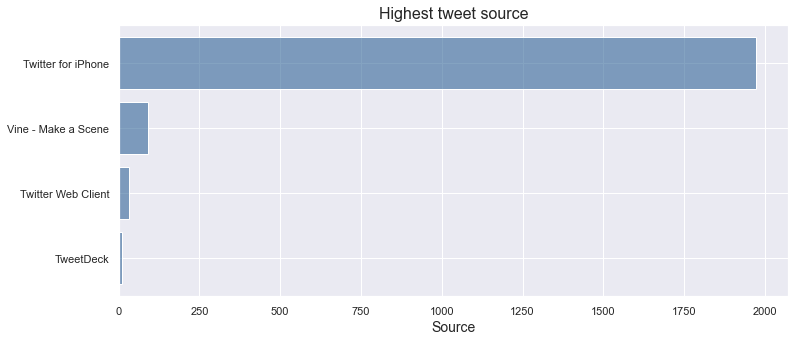

In [487]:
plt.barh(highest_source.index, highest_source, color = (0.2, 0.4, 0.6, 0.6))

plt.xlabel('Source', fontsize = 14)
plt.title('Highest tweet source', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

### Analysis #2:
**Which dog stage received the most retweets?**

In [473]:
#Dog stage with the highest retweet count
dog_stage_retweets = df_1_clean[df_1_clean.dog_stage != 'unknown']
dog_stage_retweets = dog_stage_retweets.groupby(['dog_stage'])
dog_stage_retweets = dog_stage_retweets['retweet_count'].sum()
dog_stage_retweets = dog_stage_retweets.sort_values(ascending = False)
dog_stage_retweets

dog_stage
pupper     587566
doggo      536714
puppo      170997
floofer     40836
Name: retweet_count, dtype: int64

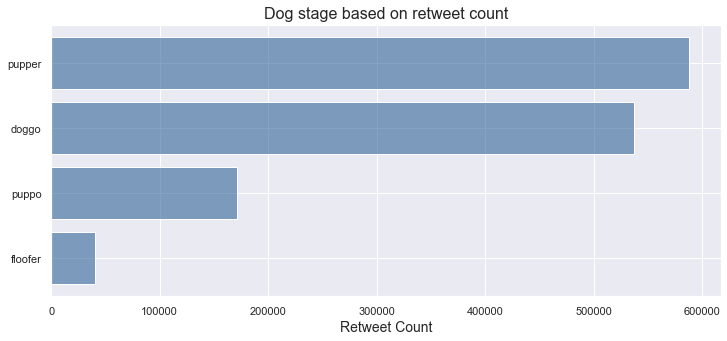

In [488]:
plt.barh(dog_stage_retweets.index, dog_stage_retweets, color = (0.2, 0.4, 0.6, 0.6))

plt.xlabel('Retweet Count', fontsize = 14)
plt.title('Dog stage based on retweet count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

### Analysis #3:
**Which dog stage received the most likes?**

In [472]:
#Dog stage with the highest favorite count
fave_dog_stage = df_1_clean[df_1_clean.dog_stage != 'unknown']
fave_dog_stage = fave_dog_stage.groupby(['dog_stage'])
fave_dog_stage = fave_dog_stage['favorite_count'].sum()
fave_dog_stage = fave_dog_stage.sort_values(ascending = False)
fave_dog_stage

dog_stage
pupper     1715911
doggo      1479079
puppo       545163
floofer     116749
Name: favorite_count, dtype: int64

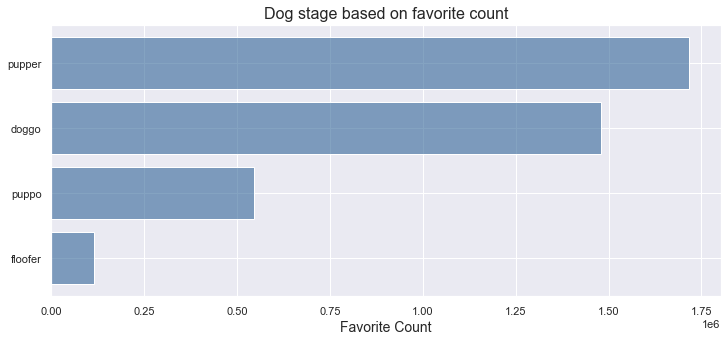

In [489]:
plt.barh(fave_dog_stage.index, fave_dog_stage, color = (0.2, 0.4, 0.6, 0.6))

plt.xlabel('Favorite Count', fontsize = 14)
plt.title('Dog stage based on favorite count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

### Analysis #4:
**Are retweets and likes correlated?**

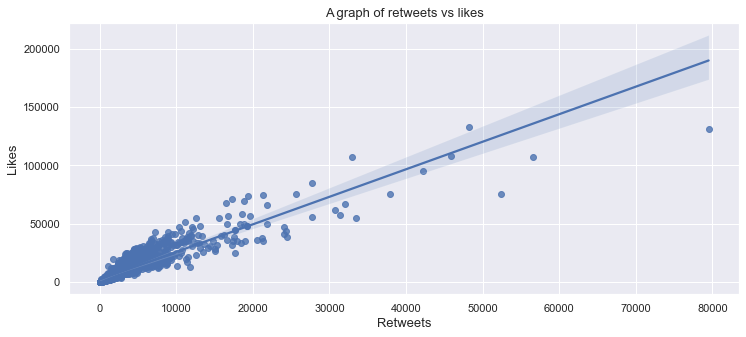

In [493]:
#plotting a graph to visualize the relationship between retweets and likes
ax = sns.regplot(x="retweet_count", y="favorite_count", data=df_1_clean)
ax.set_title("A graph of retweets vs likes",fontsize=13)
ax.set_xlabel("Retweets",fontsize=13)
ax.set_ylabel("Likes",fontsize=13)
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("whitegrid")

In [495]:
#Calculating the correlation coefficient between popularity and revenue
correlation = df_1_clean["retweet_count"].corr(df_1_clean["favorite_count"])
correlation 

0.9119514850343575

Based on the above visualization, there is a linear relationship between retweets and likes (shown by the straight line). Furthermore, the correlation coefficient is 0.9119, which shows that there is a strong correlation.

### Insights:
1. "Twitter from iPhone" is the source with the highest tweet counts

2. "Pupper" is the dog stage with the highest number of retweets 

3. "Pupper" is the most retweeted dog_stage

4. There is a linear relationship between retweets and likes (shown by the straight line). The correlation coefficient is 0.9119, which shows that there is a strong correlation.